# _Python for Scientific Data Analysis_


#  AstroPy and AstroQuery

## Section 3: AstroQuery


A lot of what it means to "do" astronomy involves querying public databases and downloading data from these sources.   And there are a TON of them: HST, JWST, Gaia, 2MASS, Keck, etc.   Just wait until we have LSST.

Astronomy/astrophysics is a data-rich, highly accessible field (as science *should* be: not all fields are like this).   E.g. in principle, any rando anywhere in the world can download public data from many ground-based and basically all space-based observatories -- usually after some proprietary period of 6 to 18 months -- and make scientific discoveries.  

E.g. I know of a few cases where -- with some cursory background in coding, statistics and knowing how to navigate the Internet -- someone could have discovered a directly imaged planet from publicly accessible data!

So how do you access all of these data?   In many cases, you have to do it manually.   But for a lot of data --especially those contained in catalogues, fully reduced and analyzed -- you can use **astroquery**.  

Astroquery is a set of tools for querying astronomical web forms and databases.

There are two other packages with complimentary functionality as Astroquery: pyvo is an Astropy affiliated package, and Simple-Cone-Search-Creator to generate a cone search service complying with the IVOA standard. They are more oriented to general virtual observatory discovery and queries, whereas Astroquery has web service specific interfaces.  

To use astroquery, we start with our same basic import functions we used for astropy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To these we add the astroquery import function

In [2]:
import astroquery

is the most basic import command.  But usually we want to import specific catalogues/servers from which astroquery will pull data.  E.g.

In [3]:
from astroquery.simbad import Simbad #Simbad astronomical database
from astroquery.vizier import Vizier #Vizier database

Let's start with these two catalog queries. These are some that are the most common ones you will want to deal with.  What are they?

* **Simbad** - SIMBAD (the Set of Identifications, Measurements and Bibliography for Astronomical Data) is an astronomical database of extrasolar objects beyond the Solar System.  [http://simbad.u-strasbg.fr/simbad/]()

* **Vizier** - The VizieR Catalogue Service is an astronomical catalog service.   [https://vizier.cds.unistra.fr/viz-bin/VizieR]()

The simplistic but helpful way of thinking about this is that Simbad will pull information for individual objects whereas Vizier details with different catalogues.  

### Major Types of Queries

There are multiple ways of querying these data sources for objects or data properties.   But two chief ones you will be interested in are ``query_object`` and ``query_region``.   The purpose of these are fairly straightforward to understand.   

To run, do 

``variable=Simbad.query_object([object name])`` 

``variable=Simbad.query_region([coordinates],r=[radius])``

etc.

For ``query_object``, the [object name] simply needs to be in single or double quotes (i.e. that it is a string variable).

You can then subscript the variable storing the query by keywords to extract parameters

Below are some examples of basic queries of the Simbad and Vizier databases ...

### Simbad

In [4]:
#convert from coordinates in simbad to a coordinate object
#c=coordinates.SkyCoord(Angle(var['RA']+' hours'),Angle(var['DEC'] + ' degrees'))

#A Simple Query

starname='hr8799'  #HR 8799
result=Simbad.query_object(starname)
result
#result[0] #prints out the same thing here

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
HD 218396,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,1


after querying Simbad for this object, you can then return specific values listed:

In [5]:
result['RA'][0] #result[0]['RA'] also works here.  it means you are selecting the 0th row of the 'RA' column
#'23 07 28.7157'

result['DEC'][0]
#'+21 08 03.310'

result['COO_BIBCODE'][0] #bibliography code

'2020yCat.1350....0G'

Compare the information listed in ``result`` with a manual search for the same object on the Simbad webpage.   You will likely see that the webpage entry contains a lot more information missing in the table.  To be able to extract this information using astroquery, you need to add the variable in question to the possible fields.  

To figure out the fields you can use, execute ``Simbad.list_votable_fields()``, which lists the possible table fields.

In [6]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

You can then add fields using ``Simbad.add_votable_fields([field name])``.    Here are examples ...

In [7]:
Simbad.add_votable_fields('flux(J)','flux(H)','flux(K)') #adds J, H, and K band photometry from 2MASS
Simbad.add_votable_fields('sp') #adds the spectral type


Then the revised query looks like the following ...

In [8]:
result=Simbad.query_object(starname)
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_J,FLUX_H,FLUX_K,SP_TYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,object,int32
HD 218396,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,5.383,5.28,5.24,F0+VkA5mA5,1


See that we've now added the four columns.    We can extract their values.  But first we need to know the names of teh columns to extract.  The mapping from the strings contained in "add votable fields" to the metadata for the table sometimes isn't one to one.  

Thankfully, you can see the names of the columns and then figure out which one corresponds to which intended field that you added.  See below ...

In [63]:
result[0].colnames

['MAIN_ID',
 'RA',
 'DEC',
 'RA_PREC',
 'DEC_PREC',
 'COO_ERR_MAJA',
 'COO_ERR_MINA',
 'COO_ERR_ANGLE',
 'COO_QUAL',
 'COO_WAVELENGTH',
 'COO_BIBCODE',
 'FLUX_J',
 'FLUX_H',
 'FLUX_K',
 'SP_TYPE',
 'SCRIPT_NUMBER_ID']

So, "Flux J" is the J band magnitude that we added as a votable field, etc etc.

Now, we can extract values

In [9]:
spt=result['SP_TYPE'][0]
#spt #'F0+VkA5mA5'

jmag=result['FLUX_J'][0]
hmag=result['FLUX_H'][0]
kmag=result['FLUX_K'][0]

print(jmag,hmag,kmag)
print(spt)

5.383 5.28 5.24
F0+VkA5mA5


The coordinate query returns strings for right ascension and declination.  With a bit of trickery you can turn this into a coordinate object in Astropy and save in units of degrees ...

In [10]:

import astropy.units as u
from astropy import coordinates 
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

ra=result['RA'][0]
dec=result['DEC'][0]

c=coordinates.SkyCoord(Angle(ra +' hours'),Angle(dec + ' degrees'))

print(c)
print(c.ra)
print(c.dec)

<SkyCoord (ICRS): (ra, dec) in deg
    (346.86964875, 21.13425278)>
346d52m10.7355s
21d08m03.31s


For a coordinate query, you are searching for objects around your target within some radius

In [60]:
result2=Simbad.query_region(c,radius=10*u.arcminute)
result2

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_J,FLUX_H,FLUX_K,SP_TYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,object,int32
HD 218396c,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,--,--,--,,1
HD 218396e,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,--,--,--,,1
HD 218396d,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,--,--,--,,1
HD 218396f,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,--,--,--,,1
HD 218396b,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,--,--,--,,1
HD 218396,23 07 28.7157,+21 08 03.310,14,14,0.037,0.040,90,A,O,2020yCat.1350....0G,5.383,5.28,5.24,F0+VkA5mA5,1
TYC 1718-851-1,23 07 24.5842,+21 08 01.068,14,14,0.013,0.013,90,A,O,2020yCat.1350....0G,7.574,6.975,6.843,G0,1
SDSS J230725.90+210459.0,23 07 25.9082,+21 04 59.093,14,14,0.029,0.032,90,A,O,2020yCat.1350....0G,15.071,14.842,14.929,,1


Now see that we have a lot more entries as we are searching for everything within a few arc-minutes.  To select out targets you do index slicing ...

In [89]:
name_result2=result2['MAIN_ID'][14]
print(name_result2)

jmag_result2=result2['FLUX_J'][0:23]
print(jmag_result2)
print(len(jmag_result2))

Gaia DR3 2832476819420749952
FLUX_J
 mag  
------
    --
    --
    --
    --
    --
 5.383
 7.574
15.071
14.867
    --
    --
10.631
    --
    --
    --
    --
    --
    --
    --
    --
    --
    --
    --
23


### Vizier


The simplest form of a Vizier query involves searching for data for a given object within a catalogue, searchable either on the object name itself or around its coordinates.  Here are some examples

In [77]:
#simple example: search all catalogues
result3=Vizier.query_object("HIP 99770")
result3

TableList with 331 tables:
	'0:I/34/greenw2a' with 16 column(s) and 1 row(s) 
	'1:I/34/greenw2b' with 17 column(s) and 1 row(s) 
	'2:I/45/catalog' with 12 column(s) and 1 row(s) 
	'3:I/61B/agk3' with 15 column(s) and 1 row(s) 
	'4:I/100A/w50' with 9 column(s) and 1 row(s) 
	'5:I/113A/catalog' with 10 column(s) and 1 row(s) 
	'6:I/122/bd' with 9 column(s) and 1 row(s) 
	'7:I/131A/sao' with 11 column(s) and 1 row(s) 
	'8:I/146/ppm1' with 12 column(s) and 1 row(s) 
	'9:I/171/acrs1' with 14 column(s) and 1 row(s) 
	'10:I/182/pacp4' with 7 column(s) and 1 row(s) 
	'11:I/196/main' with 14 column(s) and 1 row(s) 
	'12:I/196/annex1' with 10 column(s) and 2 row(s) 
	'13:I/197A/tic' with 10 column(s) and 1 row(s) 
	'14:I/238A/picat' with 15 column(s) and 1 row(s) 
	'15:I/239/hip_main' with 14 column(s) and 1 row(s) 
	'16:I/239/tyc_main' with 11 column(s) and 1 row(s) 
	'17:I/246/act' with 8 column(s) and 1 row(s) 
	'18:I/250/catalog' with 10 column(s) and 1 row(s) 
	'19:I/252/out' with 8 column(

We see that this star has data in 331 Vizier tables.  It's not a well-known star.  So you can imagine very well known stars (e.g. Vega, Fomalhaut, Altair, Sirius, etc etc) have data in _a lot_ of tables: it is easy to get lost in the volume of data.So ideally, we would like to down-select to search for data only in specific tables.   Let's do that. 

Furthermore, what  Vizier. actually returns is a _table list_ , not a table.  So slicing to get table entries is slightly more complicated vs how we would do it with Simbad tables. 

For a first try, let's do the Tycho II catalogue: (I/259/tyc2).   

In [78]:
#result4=Vizier.query_object("HIP 99770",catalog='I/239/tyc_main')
result4=Vizier.query_object("HIP 99770",catalog='I/259/tyc2')
print(result4 ) #what is this table list?
print(len(result4)) #how many entries does it have?

TableList with 1 tables:
	'0:I/259/tyc2' with 10 column(s) and 1 row(s) 
1


If we want to print out the table entries we can do that here by accessing the relevant subscript of the table.  With the above print statements we learn that this table has only one entry (which is good! There isn't a duplicate HIP 99770 entry floating around this giant catalogue).

See below

In [36]:
result4[0] #return the first (and only) table

TYC,RAhms,DEdms,Vmag,RAICRS,DEICRS,BTmag,VTmag,B-V,_RA.icrs,_DE.icrs
,,,mag,deg,deg,mag,mag,mag,deg,deg
str12,str11,str11,float32,float64,float64,float32,float32,float32,float64,float64
2683 3962 1,20 14 31.98,+36 48 22.1,4.95,303.63326023,36.80613542,5.136,4.970,0.149,303.63347728,36.80630483


Now, the above command just simply selected the first table in the table list.  You can query multiple tables at once: you just have to enclose them in square brackets...

So we are going to query a different Tycho catalog (first entry), the Hipparcos catalog (second entry), and the 2MASS catalog (third entry).  These are all all-sky surveys so they have data for a ton of objects.

In [122]:
#CAUTION!!! - note the addition of the "Angle" keyword here
result4b=Vizier.query_object("HIP 99770",catalog=['I/239/tyc_main','I/239/hip_main','II/246/out'],radius=Angle(5,"arcsec"))
#                              radius=Angle(1,"deg"))
result4b
result4b[0] #now return the second of the tables

TYC,RAhms,DEdms,Vmag,RAICRS,DEICRS,BTmag,VTmag,B-V,_RA.icrs,_DE.icrs
,,,mag,deg,deg,mag,mag,mag,deg,deg
str12,str11,str11,float32,float64,float64,float32,float32,float32,float64,float64
2683 3962 1,20 14 31.98,+36 48 22.1,4.95,303.63326023,36.80613542,5.136,4.970,0.149,303.63347728,36.80630483


With this subtlety (Table _list_ vs Table), we can now proceed to return entry values in specific tables.  E.g. ...

In [126]:
#result4[0].colnames #lists the column names
#result4[0]['TYC'] #returns the column name & all entries in the 'TYC' column
name_tyc=result4b[0]['TYC'][0] #returns the entry for this star
ra_tyc=result4b[0]['RAhms'][0]
vmag=result4b[0]['Vmag'][0]

print(name_tyc)
print(ra_tyc) #note: this is a string as you can see from the table metadata
print(vmag) #floating point

2683  3962 1
20 14 31.98
4.95


In [127]:
result4b[2] #now let's inspect the 3rd table

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
303.633484,36.806255,20143203+3648225,4.886,0.306,4.688,0.242,4.422,0.017,DDA,331,111,000,0,0


In [128]:
result4b[2]['Jmag'][0] #return the J band magnitude. #again, note the Angle call in query_object

4.886



Arguably the greater power with catalogue queries is searching entire catalogues on condition or querying around a position (any position: doesn't have to be centered on a star).    You can do this with the ``query_region`` function call.


In [129]:
#from astroquery.vizier import Vizier #already imported this
#from astroquery.coordinates import Angle #already imported this

result5=Vizier.query_region("HIP 99770",radius=Angle(0.15,"deg"),catalog='II/246/out')
result5[0]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
303.538167,36.677807,20140916+3640401,15.647,0.076,13.312,--,12.970,--,AUU,266,200,c00,0,0
303.538372,36.685192,20140920+3641066,14.804,0.043,14.686,0.059,14.523,0.123,AAB,222,111,000,0,0
303.538863,36.678677,20140932+3640432,15.282,0.070,14.066,0.119,12.900,--,AEU,226,310,cc0,0,0
303.539549,36.677696,20140949+3640397,14.205,0.042,12.847,--,12.491,--,AUU,266,300,c00,0,0
303.542784,36.686577,20141026+3641116,15.635,0.091,15.303,0.119,14.413,--,ABU,220,220,cc0,0,0
303.541583,36.684486,20140997+3641041,15.103,0.054,14.522,0.054,14.500,0.120,AAB,222,222,ccc,0,0
303.531940,36.685341,20140766+3641072,15.884,0.104,14.975,0.083,14.672,0.143,AAB,222,111,000,0,0
303.533619,36.686661,20140806+3641119,16.161,0.131,15.123,--,14.714,--,BUU,200,100,000,0,0


Now, if you look at this table you and you know anything about the star we are querying around, you immediately see a problem. Namely, we do not see our star listed (it should be about magnitude 4.5 in each 2MASS passband).

You also see the Table size is 50 (50 entries).   If you make the search radius larger you _still_ get 50 entries. 

What's happening here is that a) there are a lot of objects within our search radius and b) astroquery is truncating the entries to 50.  

So we must modify our querying ...

First, one thing we can do is tell astroquery to return _all_ row values

In [145]:
Vizier.ROW_LIMIT = -1   #all values

#Vizier.ROW_LIMIT = 50 #if we want to restore the default
#Vizier.ROW_LIMIT = 100 #if we want to return 100 values

result5b=Vizier.query_region("HIP 99770",radius=Angle(0.15,"deg"),catalog='II/246/out')
result5b[0]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
303.538167,36.677807,20140916+3640401,15.647,0.076,13.312,--,12.970,--,AUU,266,200,c00,0,0
303.538372,36.685192,20140920+3641066,14.804,0.043,14.686,0.059,14.523,0.123,AAB,222,111,000,0,0
303.538863,36.678677,20140932+3640432,15.282,0.070,14.066,0.119,12.900,--,AEU,226,310,cc0,0,0
303.539549,36.677696,20140949+3640397,14.205,0.042,12.847,--,12.491,--,AUU,266,300,c00,0,0
303.542784,36.686577,20141026+3641116,15.635,0.091,15.303,0.119,14.413,--,ABU,220,220,cc0,0,0
303.541583,36.684486,20140997+3641041,15.103,0.054,14.522,0.054,14.500,0.120,AAB,222,222,ccc,0,0
303.531940,36.685341,20140766+3641072,15.884,0.104,14.975,0.083,14.672,0.143,AAB,222,111,000,0,0
303.533619,36.686661,20140806+3641119,16.161,0.131,15.123,--,14.714,--,BUU,200,100,000,0,0


We can also return a _sorted_ table by adding a ``+`` or ``-`` in front of column names.   Let's sort on the J band magnitude.

In [177]:
#note * means "standard columns" ... otherwise you would only return the Jmag column
v=Vizier(columns=["*","+Jmag"],catalog="II/246/out")
v.ROW_LIMIT = -1

result5c=v.query_region("HIP 99770",radius=Angle(0.15,"deg"),catalog='II/246/out')
result5c[0]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
303.665097,36.752087,20143962+3645075,4.552,0.276,3.796,0.228,3.497,0.382,DDD,333,111,000,0,0
303.633484,36.806255,20143203+3648225,4.886,0.306,4.688,0.242,4.422,0.017,DDA,331,111,000,0,0
303.799735,36.863590,20151193+3651489,6.802,0.023,6.035,0.017,5.805,0.016,AAA,111,111,000,0,0
303.632409,36.661018,20143177+3639396,6.980,0.027,6.767,0.017,6.185,0.016,AAA,111,111,000,0,0
303.801214,36.769802,20151229+3646112,7.551,0.018,6.250,0.024,5.756,0.018,AAA,111,111,000,0,0
303.638422,36.915199,20143322+3654547,8.341,0.020,7.445,0.021,7.126,0.018,AAA,111,111,000,0,0
303.730587,36.722252,20145534+3643201,8.412,0.019,7.759,0.016,7.600,0.023,AAA,111,111,000,0,0
303.687070,36.691135,20144489+3641280,8.585,0.018,7.444,0.016,7.054,0.016,AAA,111,111,000,0,0


Now, it's not entirely clear which entry is the one we want from this list just from looking at it.  Is it the first or second entry?

If we compare with the Simbad position output we see that it is the second.

In [162]:
starcoords=Simbad.query_object("HIP 99770")
print(starcoords[0]['RA'],starcoords[0]['DEC'])

20 14 32.0323 +36 48 22.700


Finally, the most obvious thing to do is to just shrink our search radius.  If you do so, you (naturally) return fewer stars.  So let's shrink the radius to 20 arcseconds

In [152]:
result5d=v.query_region("HIP 99770",radius=Angle(20,"arcsec"),catalog='II/246/out')
result5d[0]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
303.633484,36.806255,20143203+3648225,4.886,0.306,4.688,0.242,4.422,0.017,DDA,331,111,000,0,0
303.627252,36.807613,20143054+3648274,12.677,--,12.179,--,12.087,0.046,UUA,002,002,00c,0,0


_Now_ it is clearer which entry we want.

We also could have kept the search radius the same but added _column filters_ to downselect on objects that "might" be the one(s) we are interested in.   See below ...

In [156]:
result5e=v.query_region("HIP 99770",radius=Angle(0.15,"deg"),catalog='II/246/out',column_filters={"Jmag":"<6"})
print(result5e[0])

 RAJ2000    DEJ2000        _2MASS       Jmag  e_Jmag  Hmag  e_Hmag  Kmag  e_Kmag Qflg Rflg Bflg Cflg Xflg Aflg
   deg        deg                       mag    mag    mag    mag    mag    mag                                
---------- ---------- ---------------- ------ ------ ------ ------ ------ ------ ---- ---- ---- ---- ---- ----
303.665097  36.752087 20143962+3645075  4.552  0.276  3.796  0.228  3.497  0.382  DDD  333  111  000    0    0
303.633484  36.806255 20143203+3648225  4.886  0.306  4.688  0.242  4.422  0.017  DDA  331  111  000    0    0


In [161]:
#slightly more complex

#the two dots define a range
result5f=v.query_region("HIP 99770",radius=Angle(0.15,"deg"),catalog='II/246/out',
                         column_filters={"Jmag":"4 .. 4.7"})
print(result5f[0])

 RAJ2000    DEJ2000        _2MASS       Jmag  e_Jmag  Hmag  e_Hmag  Kmag  e_Kmag Qflg Rflg Bflg Cflg Xflg Aflg
   deg        deg                       mag    mag    mag    mag    mag    mag                                
---------- ---------- ---------------- ------ ------ ------ ------ ------ ------ ---- ---- ---- ---- ---- ----
303.665097  36.752087 20143962+3645075  4.552  0.276  3.796  0.228  3.497  0.382  DDD  333  111  000    0    0


Now, we don't actually have to center the search on the position of a known object.  We can center it on blank space, provided that put in a coordinate object in our Vizier call.   Here's what I mean ...

In [174]:
#let's select a region just slightly off HIP 99770, about halfway between it and the other bright star
blankspace=SkyCoord('20h14m37.0s','+36d46m00.0s')
blankspace

<SkyCoord (ICRS): (ra, dec) in deg
    (303.65416667, 36.76666667)>

In [176]:
v2=Vizier(columns=["*","+Jmag"])

result6=v2.query_region(blankspace,
   radius=Angle(0.1,"deg"),catalog='II/246/out',column_filters={"Jmag":"<18"})

result6[0]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
303.665097,36.752087,20143962+3645075,4.552,0.276,3.796,0.228,3.497,0.382,DDD,333,111,000,0,0
303.633484,36.806255,20143203+3648225,4.886,0.306,4.688,0.242,4.422,0.017,DDA,331,111,000,0,0
303.730587,36.722252,20145534+3643201,8.412,0.019,7.759,0.016,7.600,0.023,AAA,111,111,000,0,0
303.687070,36.691135,20144489+3641280,8.585,0.018,7.444,0.016,7.054,0.016,AAA,111,111,000,0,0
303.630881,36.769279,20143141+3646094,8.641,0.024,7.387,0.020,6.864,0.016,AAA,111,111,000,0,0
303.660843,36.861553,20143860+3651415,8.811,0.026,8.665,0.026,8.642,0.015,AAA,112,111,000,0,0
303.674455,36.822105,20144186+3649195,8.816,0.020,8.081,0.018,7.851,0.015,AAA,112,111,s0s,0,0
303.570011,36.718445,20141680+3643064,9.081,0.020,7.671,0.020,7.093,0.017,AAA,211,111,000,0,0


### Other Queries

There are other databases you can query.  One major one is the Gaia database which has its own subpackage.   I will try to add notes on this later.

### Some Examples of Doing Science with Database Queries

So how would you actually use this in real code?   Below is one example: 
* an abbreviated example copied and pasted from some code that I wrote last year to select targets.  It has an input file and then queries the Simbad and Vizier databases

In [180]:
#Example 

#uses IDL output of HGCA accelerators, queries Simbad to get the spectral type, queries Gaia-eDR3 to get photometry, saves to output
import astroquery
import numpy as np
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.io import ascii
import astropy.units as u
import astropy.coordinates as coord
from astropy.table import QTable
#from astroquery.utils.tap.core import TapPlus
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord,Angle

infile='astars_100pc'
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source"
radius=u.Quantity(1.5/3600.0,u.deg)

def add_gaia_data(infile):

    outfile=infile+'_plus_gaia_and_cahkv2'

    #formatted loading
    dtypes={'names': ('name1','name2','ra1','ra2','ra3','dec1','dec2','dec3','distance','spt','mass','chisq'),\
       'formats':('U20','U20',np.int,np.int,np.float64,np.int,np.int,np.float64,np.float64,'U20',np.float64,np.float64)}

    a= np.loadtxt(infile,usecols=range(12),dtype=dtypes)

    #combining the first two strings to get the target name
    names = np.array([ '{0} {1}'.format( x, y ) for x,y in zip( a['name1'], a['name2'] ) ])
    names =np.array(names,dtype=str)

    mass=a['mass']
    chisq=a['chisq']
    #determine ra and dec
    ra_deg=(a['ra1']+a['ra2']/60.+a['ra3']/3600.)*15
    dec_deg=(np.abs(a['dec1'])+np.abs(a['dec2']/60.)+np.abs(a['dec3']/3600.))

    pos = a['dec1'] >= 0
    neg = (a['dec1'] < 0) | (a['dec2'] < 0)
    print(len(neg))
    dec_deg[neg]=-1*dec_deg[neg]


    nstar=len(dec_deg)

    plx=np.zeros(nstar)
    gmag=np.zeros(nstar)
    bp_rp=np.zeros(nstar)
    ra=np.zeros(nstar)
    dec=np.zeros(nstar)
    bmv=np.zeros(nstar)
    hkact=np.zeros(nstar)

    Simbad.add_votable_fields('sptype')
    Simbad.timeout=60
    Vizier.timeout=60

    spt= ["" for i in range(nstar)]
    for i in range(nstar):
       print('processing star number ',i,' star name ',names[i])

       #simbad
       try:
        results=Simbad.query_object(names[i])
       except:
        print('!!!!!Error on ',names[i])
        continue
       spt[i]=results['SP_TYPE'][0]

       coord=SkyCoord(ra=ra_deg[i],dec=dec_deg[i],unit=(u.degree,u.degree),frame='icrs')
       r=Gaia.cone_search(coord,radius)
       j=r.get_results()
       try:
         ra[i]=j['ra'][0]
         dec[i]=j['dec'][0]
#         print('found star ',i,names[i],ra_deg[i],dec_deg[i],(a['dec1'])[i],(a['dec2'])[i],(a['dec3'])[i])
       except:
         print('missing star ',i,names[i],ra_deg[i],dec_deg[i],(a['dec1'])[i],(a['dec2'])[i],(a['dec3'])[i])
         continue
       plx[i]=j['parallax'][0]
       gmag[i]=j['phot_g_mean_mag'][0]
       bp_rp[i]=j['bp_rp'][0]

       #now, pull Tycho II catalog
       result=Vizier.query_region(SkyCoord.from_name(names[i]),radius=Angle(5/3600.,"deg"),catalog=['I/259/tyc2'])
       #print(result)
       #result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['I/259/tyc2'])
       #print(result[0]['BTmag'][0])

       if len(result) >= 1:
         btmag=result[0]['BTmag'][0]
         vtmag=result[0]['VTmag'][0]
         bmag,vmag=tycho_convert(btmag,vtmag)
         #print(bmag,vmag,btmag,vtmag)
       else:
         bmag= -99
         vmag=-109

       caHK=99 #initializing to NaN

       #now, pull catalogs to find if the star has an activity measurement
       #Pace+2013
       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/A+A/551/L8'])
       try:
         caHK=0.5*(result[0]['logRmin'][0]+result[0]['logRmax'][0])
       except:
         caHK=99

       #Gondoin+2020
       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/A+A/641/A110'])
       try:
          newHK=result[0]["logR'HK"][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Hojjatpanah+2020
       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/A+A/639/A35'])
       try:
          newHK=result[0]["logR'HK"][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Hojjatpanah+2019
       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/A+A/629/A80'])
       try:
          newHK=result[0]["logR'HK"][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Lick Planet Search 2010
       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/ApJ/725/875/table1'])
       try:
          newHK=result[0]['logRHK'][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Gray/Nstars-south

       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/AJ/132/161'])
       try:
          newHK=result[0]['logR'][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Gray/Nstars-north

       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/AJ/126/2048'])
       try:
          newHK=result[0]["logR'HK"][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Boro Saikia+2018
       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/A+A/616/A108'])
       try:
          newHK=result[0]['logRpHK'][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #Hinkel+2017

       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/ApJ/848/34'])
       try:
          newHK=result[0]['logRpHK'][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99

       #White and Hillenbrand 2007

       result=Vizier.query_object(names[i],radius=Angle(5/3600.,"deg"),catalog=['J/AJ/133/2524'])
       try:
          newHK=result[0]['logRHK'][0]
          caHK=np.minimum(caHK,newHK)
       except:
          newHK=99


       hkact[i]=caHK
       bmv[i]=bmag-vmag
       print('bmv and CaHK for ',names[i],' are ',bmv[i],hkact[i])

    gmag_abs=np.array(gmag-5*np.log10(1e2/plx))

    f=open(outfile,'w')
    for i in range(len(ra)):
       f.write("%s %.3s %f %f %f %f %f %f %f %f %f %f\n" % (names[i].replace(" ",""),spt[i],mass[i],chisq[i],ra[i],dec[i],plx[i],gmag_abs[i],gmag[i],bp_rp[i],bmv[i],hkact[i]))
       #f.write("%s %f %f %f %f %f %f\n" % (names[i].replace(" ",""),ra[i],dec[i],plx[i],gmag_abs[i],gmag[i],bp_rp[i]))

    f.close()

def tycho_convert(BT,VT):
      v=VT-0.09*(BT-VT)
      b=v+0.85*(BT-VT)

      return b, v


In [179]:
directory='./code/sect3/files/'
filename='gkm_30pctest'
add_gaia_data(directory+filename)

/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_44878/1873657264.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'formats':('U20','U20',np.int,np.int,np.float64,np.int,np.int,np.float64,np.float64,'U20',np.float64,np.float64)}


10
processing star number  0  star name  HIP 522
bmv and CaHK for  HIP 522  are  0.4606998443603514 -4.77036496665
processing star number  1  star name  HIP 669


bmv and CaHK for  HIP 669  are  0.5754500389099118 -4.7779998779296875
processing star number  2  star name  HIP 1068
bmv and CaHK for  HIP 1068  are  10.0 99.0
processing star number  3  star name  HIP 1349
bmv and CaHK for  HIP 1349  are  0.5865000486373901 -4.75032990602
processing star number  4  star name  HIP 1444


bmv and CaHK for  HIP 1444  are  0.5516501426696774 -5.30448706779
processing star number  5  star name  HIP 1598


bmv and CaHK for  HIP 1598  are  0.5847997665405273 -4.923999786376953
processing star number  6  star name  HIP 2790
bmv and CaHK for  HIP 2790  are  0.7029497146606438 -4.89611434898
processing star number  7  star name  HIP 3008
bmv and CaHK for  HIP 3008  are  1.2078495979309078 99.0
processing star number  8  star name  HIP 3588
bmv and CaHK for  HIP 3588  are  1.2095494747161872 -4.58653262788
processing star number  9  star name  HIP 3879
bmv and CaHK for  HIP 3879  are  1.1746999740600579 -4.36561680453


This creates a file that we can read in ...

[1.583799 2.068107 3.325006 4.226865 4.497121]
[-49.075368 -14.824541  69.32568  -52.650335 -13.455642]


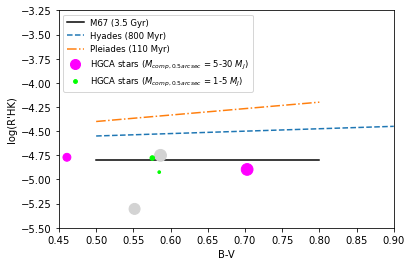

In [181]:
from math import exp, log10

directory='./code/sect3/files/'
file0='gkm_30pctest_plus_gaia_and_cahkv2'
def run(infile=file0):
   table=np.loadtxt(directory+infile,dtype=np.unicode_)
   hgca_name=table[:,0]
   hgca_bmv=table[:,10].astype(float)
   hgca_cahk=table[:,11].astype(float)
   hgca_mass=table[:,2].astype(float)
   hgca_ra=table[:,4].astype(float)
   hgca_dec=table[:,5].astype(float)
   plx=table[:,6].astype(float)

   print(hgca_ra[0:5])
   print(hgca_dec[0:5])

   detectable= np.where( (hgca_mass > 5.0) & (hgca_mass < 30))
   lowmass=np.where((hgca_mass < 5.0) & (hgca_mass > 1.0))
   c1='lightgray'
   m1='.'
   #label1='HGCA stars ($M_{comp, 0.5 arcsec}$ = $1-5 M_{J}$)'

   c2='lime'
   m2='.'
   label2='HGCA stars ($M_{comp, 0.5 arcsec}$ = 1-5 $M_{J}$)'

   c3='magenta'
   m3='.'
   label3='HGCA stars ($M_{comp, 0.5 arcsec}$ = 5-30 $M_{J}$)'
   plt.xlim(0.45,0.9)
   plt.ylim(-5.5,-3.25)
   plt.xlabel("B-V")
   plt.ylabel("log(R'HK)")
   hyades_bmv=[0.5,0.9]
   pleiades_bmv=[0.5,0.8]
   hyades_cahk=[-4.55,-4.45]
   pleiades_cahk=[-4.4,-4.2]
   m67_bmv=[0.5,0.8]
   m67_cahk=[-4.8,-4.8]
   plt.plot(m67_bmv,m67_cahk,'-',zorder=1,label='M67 (3.5 Gyr)',c='black')
   plt.plot(hyades_bmv,hyades_cahk,'--',zorder=1,label='Hyades (800 Myr)')
   plt.plot(pleiades_bmv,pleiades_cahk,'-.',zorder=1,label='Pleiades (110 Myr)')

   plt.scatter(hgca_bmv,hgca_cahk,marker=m1,c=c1,s=30*hgca_mass/2,zorder=2)
   plt.scatter(hgca_bmv[detectable],hgca_cahk[detectable],marker=m3,c=c3,label=label3,s=50*hgca_mass[detectable]/2,zorder=2)
   plt.scatter(hgca_bmv[lowmass],hgca_cahk[lowmass],marker=m2,c=c2,label=label2,s=50*hgca_mass[lowmass]/2,zorder=2)
   plt.legend(loc='upper left',fontsize=8.5)

    
run()

A fuller version of this plot (where I didn't truncate the sample), looks like the following...
                               
![png](./code/sect3/figures/cahk.png)                            